In [74]:
# настройка пути к файлу и подключение библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from math import *

df=pd.read_csv('somascan_171_vs_1305.tsv',sep="\t")

In [75]:
plt.style.use('seaborn-muted')

plt.rc('font', size=15, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=17)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=17)  # fontsize of the figure title

df[df.columns[4:]]=(df[df.columns[4:]]).applymap(lambda x: np.float64(x.replace(',','.'))) 
# значения столбцов под нужный тип данных

b1 = df.columns[4:].map(lambda name_protein: scipy.stats.spearmanr(df['Age'], df[name_protein])[0]) 
# вычисляем коэффициент корелляции Спирмена(более устойчивый к выбросам как непараметрический) для всех показателей уровня белков

max_list = sorted(zip(df.columns[4:],b1), key=lambda t: abs(t[1]))[(-5):]  
# выбираем наиболее изменяющиеся в процессе старения показатели

names_proteins=[]
for i in range(5):
    names_proteins.append(max_list[i][0])
# создаем массив с названиями выбранных белков

df=df.sort_values(by='Age')
# сортируем по возрасту, чтобы в дальнейшем получить более наглядные box-plots



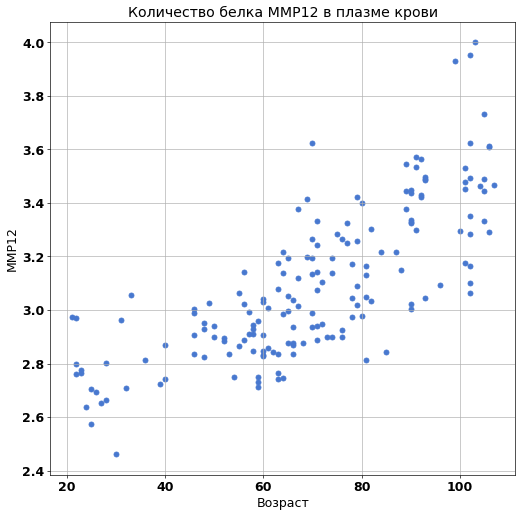

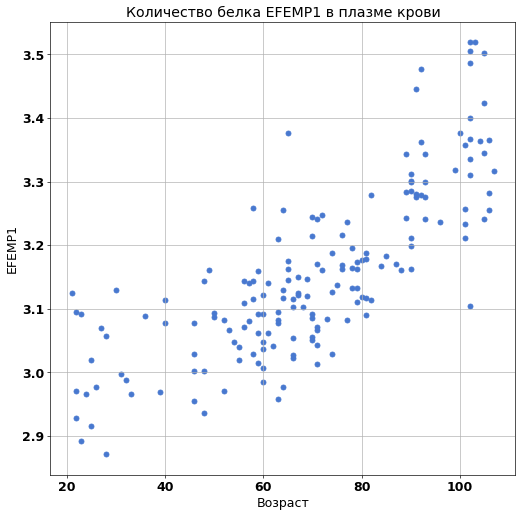

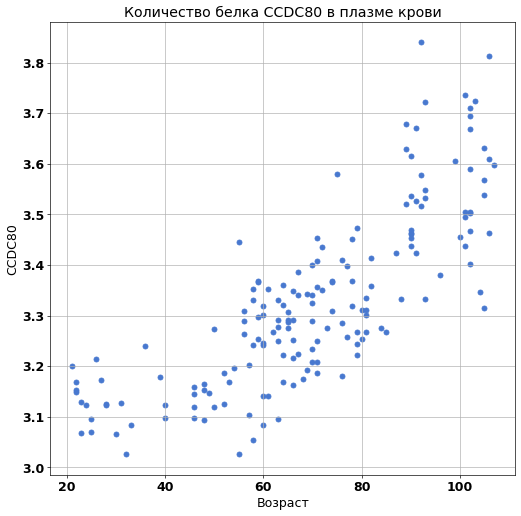

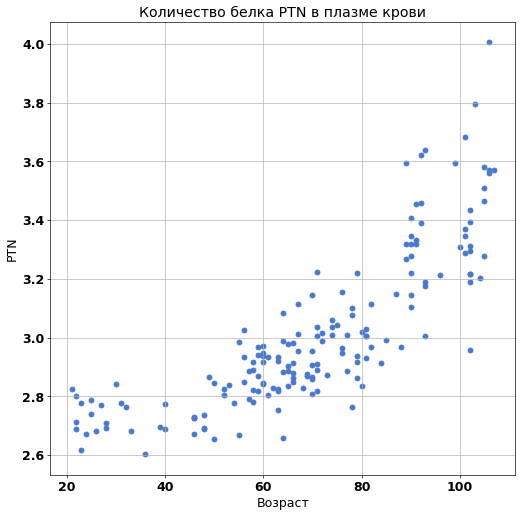

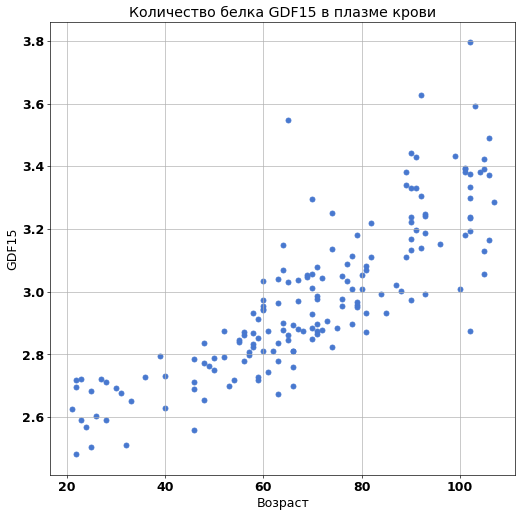

In [76]:
# создаем графики с распределением показателей белков по всем данным
for i in range(len(max_list)):
    plt.figure(figsize=(10,10), dpi=60)
    plt.scatter(df['Age'], df[max_list[i][0]])               # scatter plot
    plt.grid()                                               # grid lines
    plt.xlabel('Возраст')                                    # xlabel
    plt.ylabel(max_list[i][0])                               # ylabel
    title='Количество белка '+ max_list[i][0] +' в плазме крови'
    plt.title(title)                                         # title
    plt.show()                                               # show everything


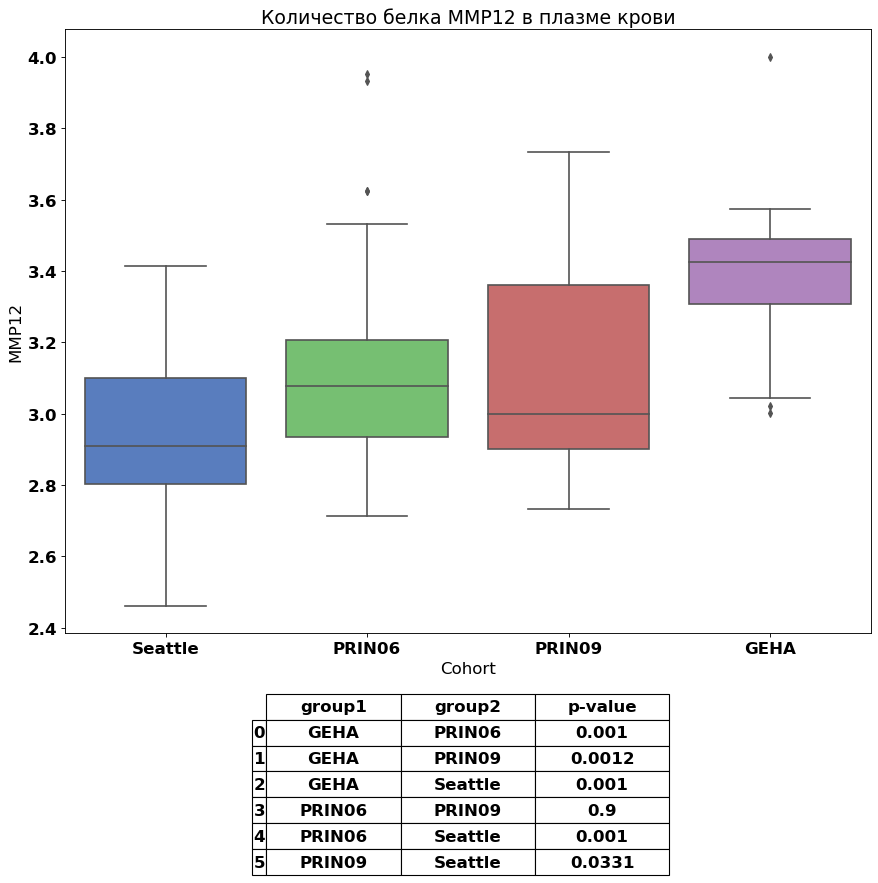

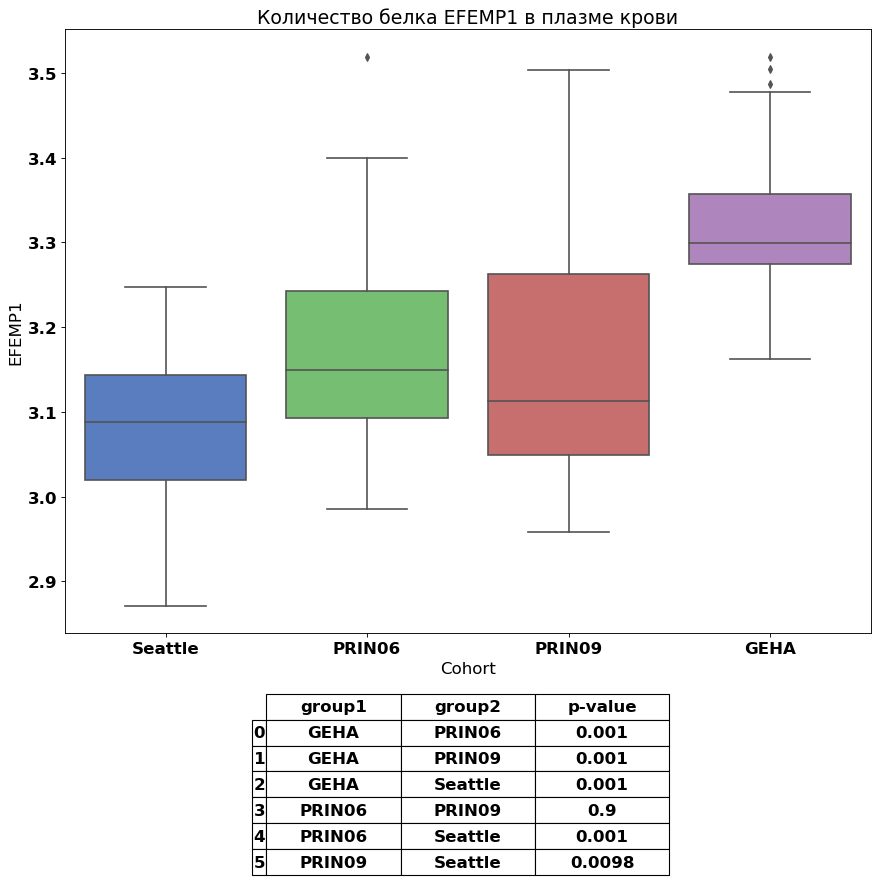

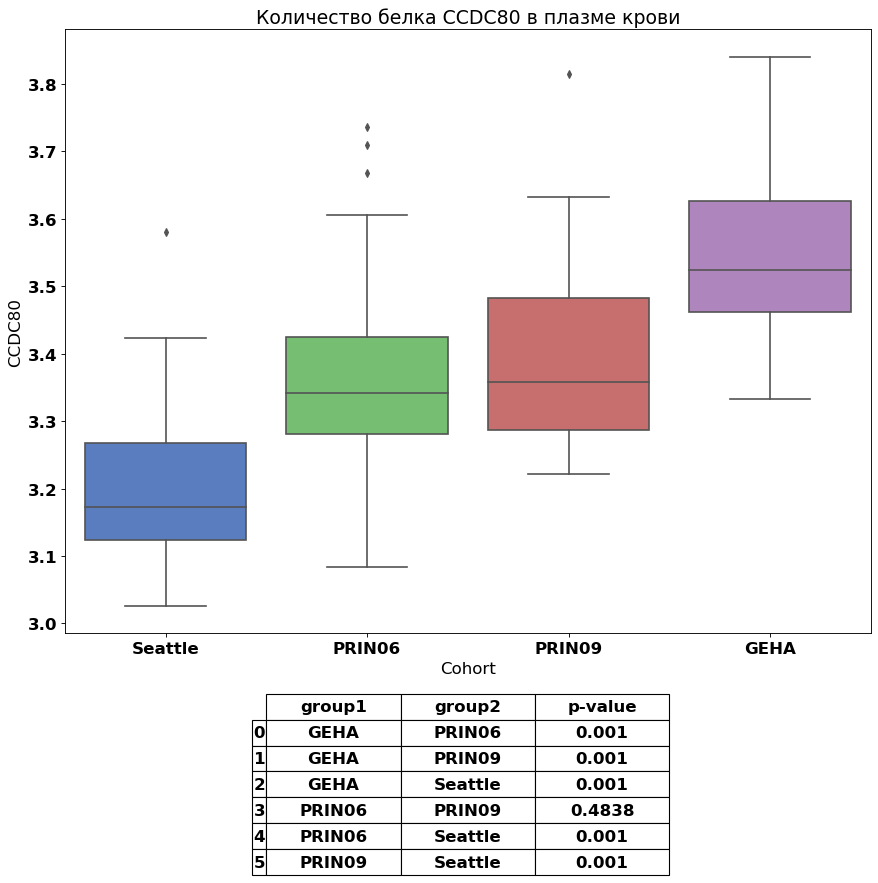

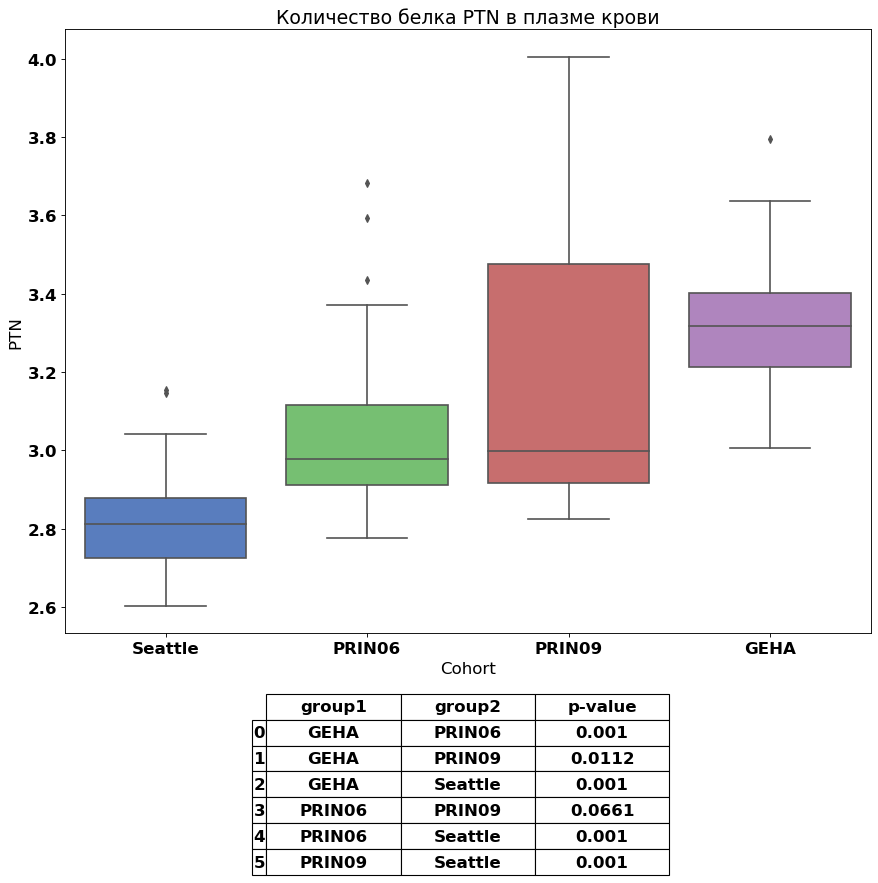

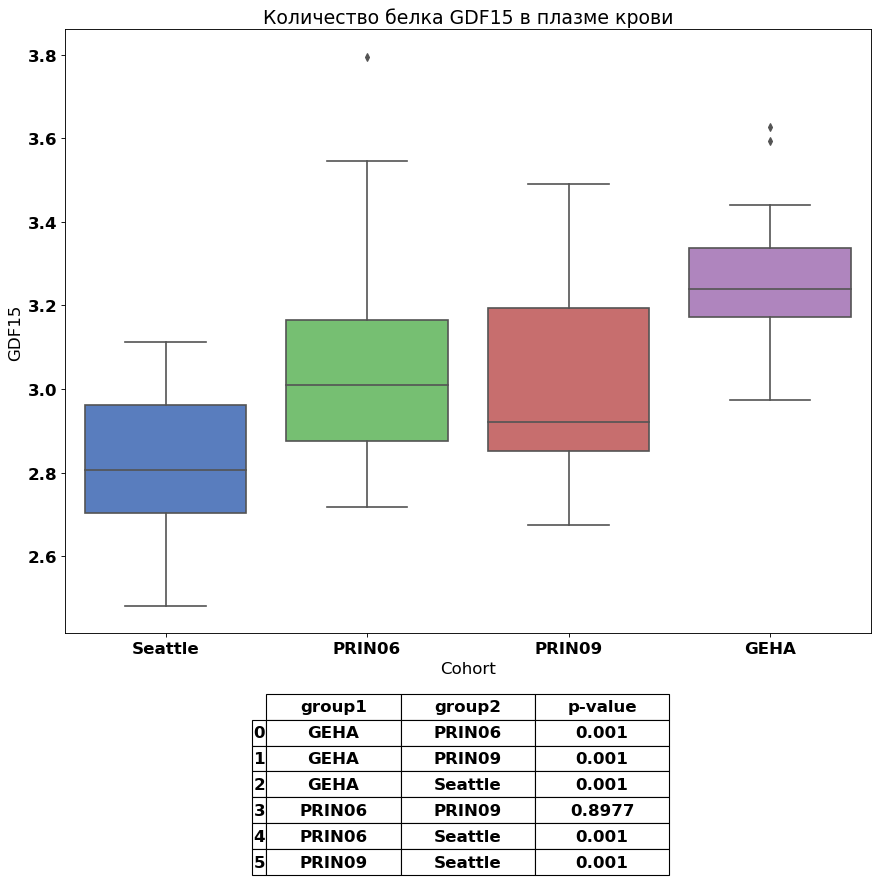

In [77]:
for i in range(5):
    # построение box-plot для отображения разницы между возрастными группами
    plt.figure(figsize=(13,10), dpi=80)
    nap=names_proteins[i]  # берем на каждой итерации один из пяти показателей
    title='Количество белка '+nap+' в плазме крови'
    plt.title(title)
    sns.boxplot(x='Cohort', y=nap, data=df, notch=False)
    
    # таблица для отображения p-value при проверке равенства средних значений между выборками в диапазонах(все группы попарно 
    # сравниваются) с помощью критерия Тьюки
    MultiComp = MultiComparison(df[nap], df['Cohort'])
    Results=MultiComp.tukeyhsd()
    df_res = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
    df_res.rename(columns={'p-adj': 'p-value'}, inplace=True)
    df_res=df_res[['group1','group2','p-value']]
    
    # вывод на экран
    plt.table(cellText=df_res.values,colWidths = [0.25]*len(df_res.columns),
    rowLabels=df_res.index,
    colLabels=df_res.columns,
    cellLoc = 'center', rowLoc = 'center',
    loc=2, bbox=[0.25, -0.4, 0.5, 0.3])
    plt.show()
    
   